# CA1 - Linechart to analyse completed units by property type using HDB dataset

In [1]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load csv file and create dataset 

filename = "C:/Users/lokf2/Desktop/SPDS/IT8701/CA1 Assignment1/hdb_dataset/CompletionStatusofHDBResidentialDevelopments.csv"

data = np.genfromtxt(filename,  
                     skip_header=1, 
                     dtype=[('financial','U10'), ('type','U50'), ('status', 'U50'), ('no_of_units','i8')], 
                     delimiter=",",
                     missing_values=['na', '-', 'NA'], filling_values=0)

print(data[:10])
print(data.dtype)
print(data.shape)

[('2007', 'HDB Flats', 'Completed',  6247)
 ('2007', 'HDB Flats', 'Under Construction', 18073)
 ('2007', 'HDB Flats', 'Awarded', 10108)
 ('2007', 'DBSS', 'Completed',     0)
 ('2007', 'DBSS', 'Under Construction',     0)
 ('2008', 'HDB Flats', 'Completed',  1769)
 ('2008', 'HDB Flats', 'Under Construction', 31058)
 ('2008', 'HDB Flats', 'Awarded', 14754)
 ('2008', 'DBSS', 'Completed',     0)
 ('2008', 'DBSS', 'Under Construction',     0)]
[('financial', '<U10'), ('type', '<U50'), ('status', '<U50'), ('no_of_units', '<i8')]
(80,)


In [3]:
# Printout useful information about the datset 
print("*** Useful summary of dataset - Completion Status of HDB Residential Developments ***")
print()
print(f"There are {len(data)} rows and {len(data[0])} columns in this dataset")
print()

print("[The names of the columns are:]")
for col in data.dtype.names:
    print(f"- {col} <class '{data[col].dtype}'> isnumeric: {np.issubdtype(data[col].dtype, np.number)}")
print()

print("[The unique values in each column are:]") 
for col in data.dtype.names:
    unique_values = np.unique(data[col])
    print(f"{len(unique_values)} unique values in {col} column")


*** Useful summary of dataset - Completion Status of HDB Residential Developments ***

There are 80 rows and 4 columns in this dataset

[The names of the columns are:]
- financial <class '<U10'> isnumeric: False
- type <class '<U50'> isnumeric: False
- status <class '<U50'> isnumeric: False
- no_of_units <class 'int64'> isnumeric: True

[The unique values in each column are:]
16 unique values in financial column
2 unique values in type column
3 unique values in status column
57 unique values in no_of_units column


In [4]:
# Convert year to numeric values
years = data['financial'].astype(int)

# Extract data for Completed HDB Flats only
x_HDB = years[(data['type'] == 'HDB Flats') & (data['status']=='Completed')]
y_HDB = data[(data['type'] == 'HDB Flats') & (data['status']=='Completed')]['no_of_units']


In [5]:
print(x_HDB)
print(x_HDB.shape)
print()
print(y_HDB)
print(y_HDB.shape)

[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022]
(16,)

[ 6247  1769  7050 11888 17947 11541 16881 26723 23716 25530 31325 15748
 13093  8234 13627 23782]
(16,)


In [6]:
# Extract data for Completed DBSS only
x_DBSS = years[(data['type'] == 'DBSS') & (data['status']=='Completed')]
y_DBSS = data[(data['type'] == 'DBSS') & (data['status']=='Completed')]['no_of_units']

In [7]:
print(x_DBSS)
print(x_DBSS.shape)
print()
print(y_DBSS)
print(y_DBSS.shape)

[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022]
(16,)

[   0    0    0    0 1058 1203  806 3446  447    0    0    0    0    0
    0    0]
(16,)


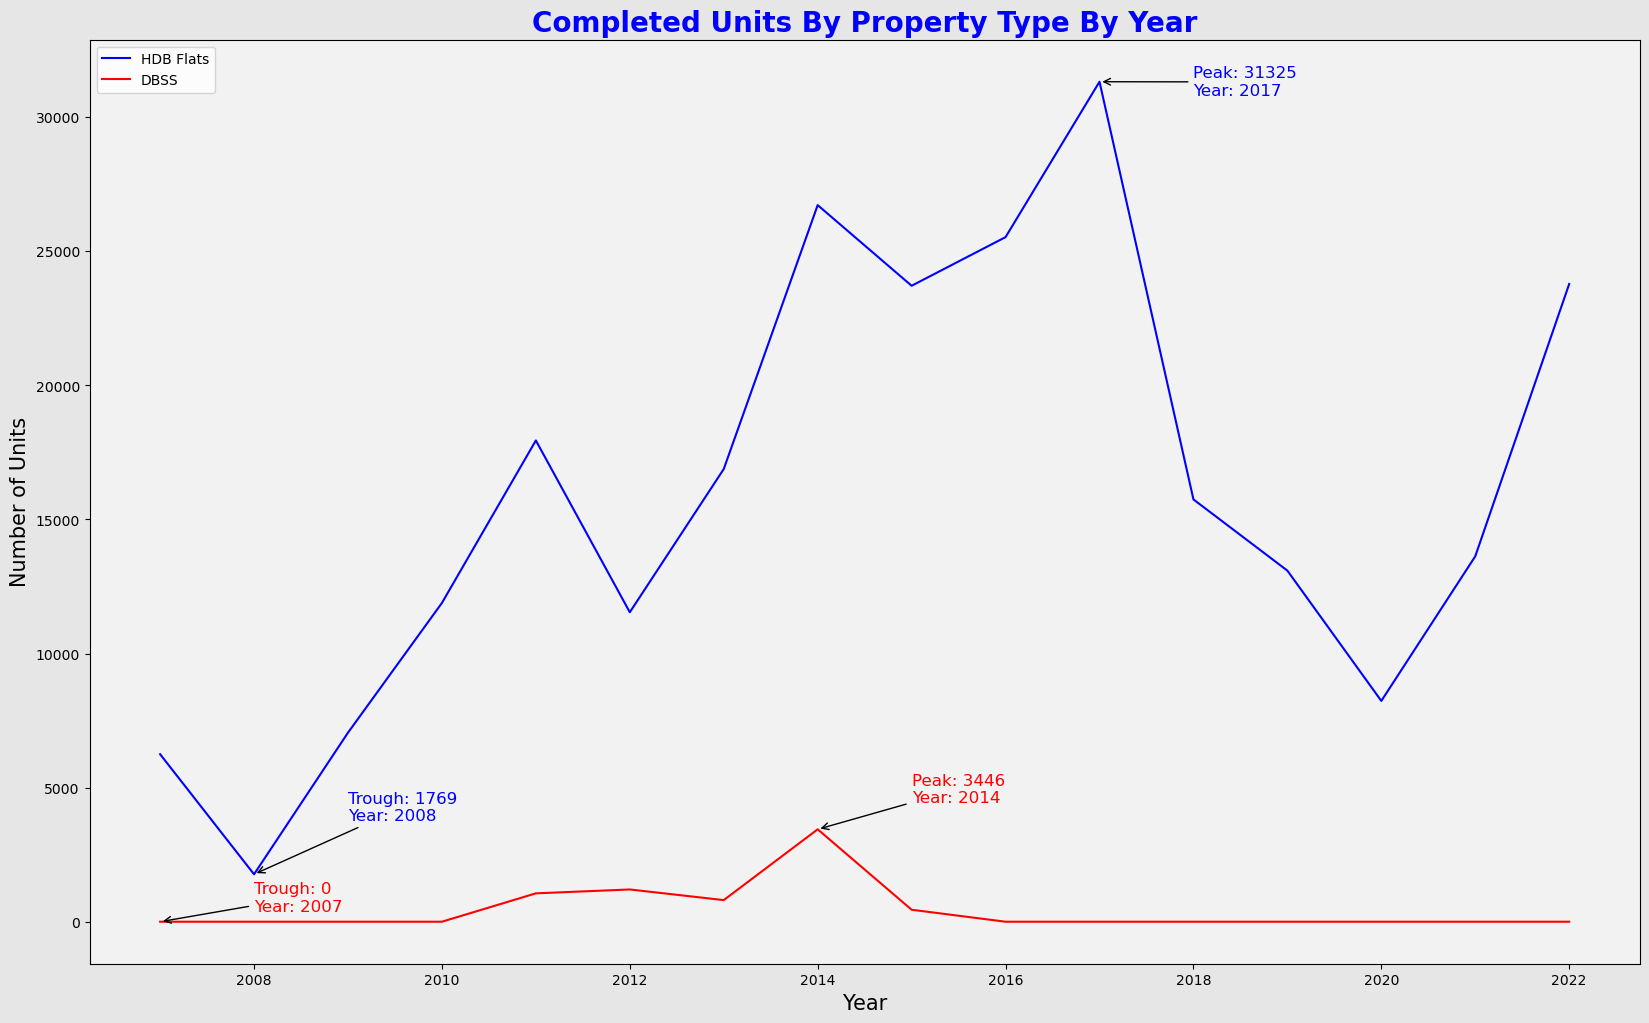

In [8]:
# Create Line Chart

fig, ax1 = plt.subplots(figsize=(20,12))

# Set background color for the axes and figure
ax1.set_facecolor('#f2f2f2')  # Light gray background for the plot area
fig.patch.set_facecolor('#e6e6e6')  # Slightly darker gray background for the figure

ax1.plot(x_HDB, y_HDB, c='b',  label='HDB Flats')
ax1.plot(x_DBSS,y_DBSS, c='r', label='DBSS')

plt.title('Completed Units By Property Type By Year', fontsize=20, fontweight='bold', color='blue')
plt.ylabel('Number of Units', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.legend(loc='upper left');

# Ensure the x-axis has correct intervals
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Identify peak and trough for HDB Flats
peak_HDB_index = np.argmax(y_HDB)
trough_HDB_index = np.argmin(y_HDB)
peak_HDB_year = x_HDB[peak_HDB_index]
trough_HDB_year = x_HDB[trough_HDB_index]
peak_HDB_value = y_HDB[peak_HDB_index]
trough_HDB_value = y_HDB[trough_HDB_index]

# Identify peak and trough for DBSS
peak_DBSS_index = np.argmax(y_DBSS)
trough_DBSS_index = np.argmin(y_DBSS)
peak_DBSS_year = x_DBSS[peak_DBSS_index]
trough_DBSS_year = x_DBSS[trough_DBSS_index]
peak_DBSS_value = y_DBSS[peak_DBSS_index]
trough_DBSS_value = y_DBSS[trough_DBSS_index]

# Annotate peak and trough for HDB Flats
ax1.annotate(f'Peak: {peak_HDB_value}\nYear: {peak_HDB_year}', 
             xy=(peak_HDB_year, peak_HDB_value), 
             xytext=(peak_HDB_year + 1, peak_HDB_value - 500),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='blue')

ax1.annotate(f'Trough: {trough_HDB_value}\nYear: {trough_HDB_year}', 
             xy=(trough_HDB_year, trough_HDB_value), 
             xytext=(trough_HDB_year + 1, trough_HDB_value + 2000),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='blue')

# Annotate peak and trough for DBSS
ax1.annotate(f'Peak: {peak_DBSS_value}\nYear: {peak_DBSS_year}', 
             xy=(peak_DBSS_year, peak_DBSS_value), 
             xytext=(peak_DBSS_year + 1, peak_DBSS_value + 1000),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='red')

ax1.annotate(f'Trough: {trough_DBSS_value}\nYear: {trough_DBSS_year}', 
             xy=(trough_DBSS_year, trough_DBSS_value), 
             xytext=(trough_DBSS_year + 1, trough_DBSS_value + 400),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='red')

# Save the line chart to a png file
plt.savefig('Line Chart - Completed Units By Property Type By Year.png', dpi=300, bbox_inches='tight')

plt.show()